In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.. Lets Read data & perform basic analysis

In [3]:
df = pd.read_csv('C:/Users/HP/Documents/sql_project/projects/project 15/Bitcoin/bitcoin_price_Training - Training.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [9]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.63,523.14,68.50,254.29,438.60,662.44,2953.22
High,1556.0,597.99,542.99,74.56,260.33,447.56,674.52,2999.91
Low,1556.0,567.85,505.88,65.53,248.84,430.57,646.74,2840.53
Close,1556.0,584.24,525.90,68.43,254.32,438.86,663.40,2958.11


### 2.. Doing Data Pre-processing

In [10]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [11]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [15]:
df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [16]:
df['Date'].max()

Timestamp('2017-07-31 00:00:00')

In [17]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


### 3.. Analysing change in price of the stock overtime?

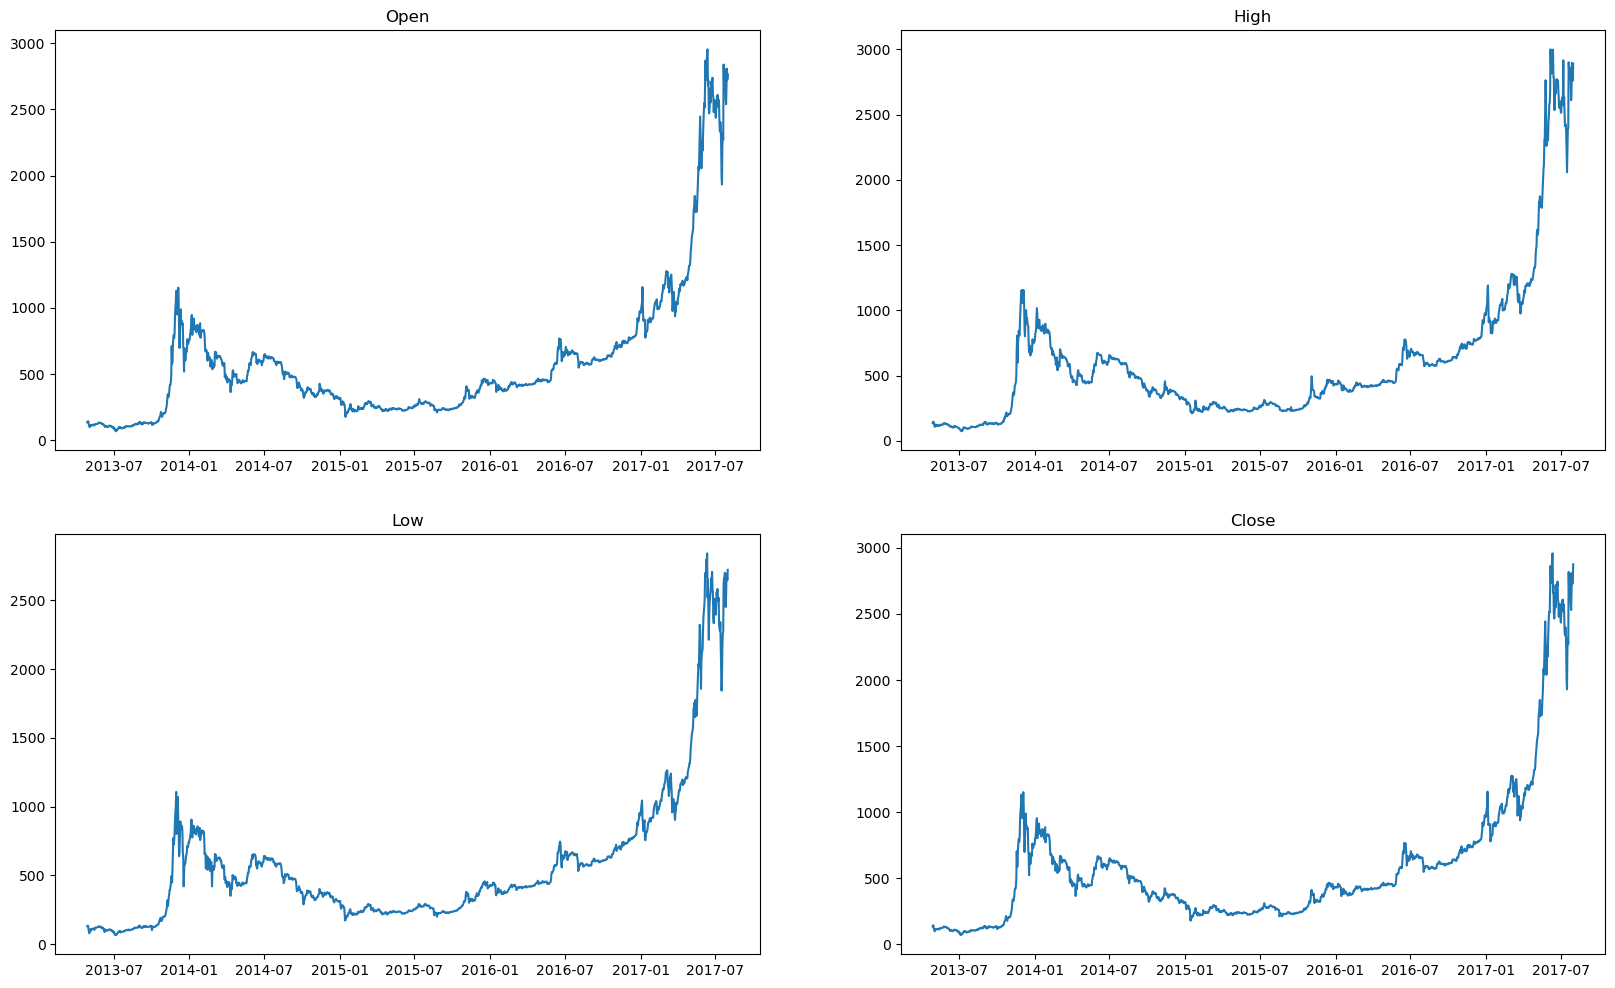

In [20]:
plt.figure(figsize=(20,12))

for index , col in enumerate(['Open', 'High', 'Low', 'Close'] , 1):
    plt.subplot(2,2,index)
    plt.plot(df['Date'] , df[col])
    plt.title(col)

In [22]:
df.shape

(1556, 7)

### 4.. Analysing open , high , low , close value of Bitcoin 

In [23]:
bitcoin_sample = df[0:50]

In [26]:
!pip install chart_studio
!pip install plotly

In [28]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [29]:
init_notebook_mode(connected=True)

In [30]:
trace = go.Candlestick(x=bitcoin_sample['Date'] , 
              high =bitcoin_sample['High'] , 
              open = bitcoin_sample['Open'] , 
              close = bitcoin_sample['Close'] , 
              low = bitcoin_sample['Low'])

In [32]:
candle_data = [trace]

layout = {
    'title':'Bitcoin Historical Price' , 
    'xaxis':{'title':'Date'}
}

In [33]:
fig = go.Figure(data = candle_data , layout=layout)

fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

In [34]:
df.set_index('Date' , inplace=True)

In [36]:
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


### 5.. Analysing closing price (on normal scale & log-scale)

<Axes: xlabel='Date'>

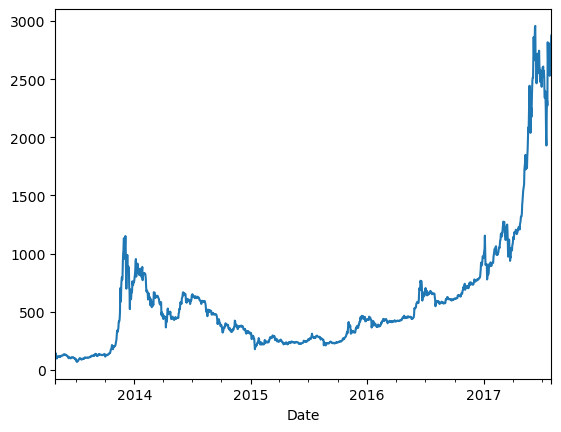

In [40]:
df['Close'].plot()

<Axes: xlabel='Date'>

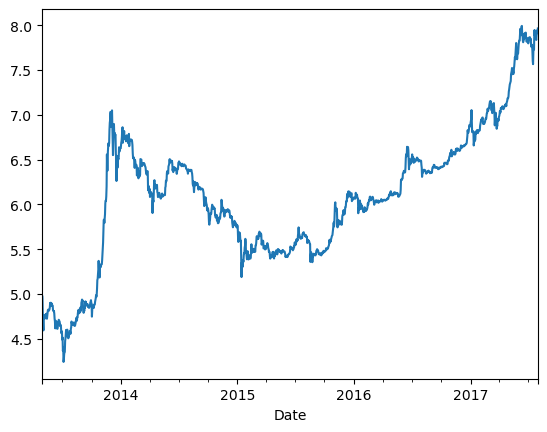

In [41]:
np.log1p(df['Close']).plot()

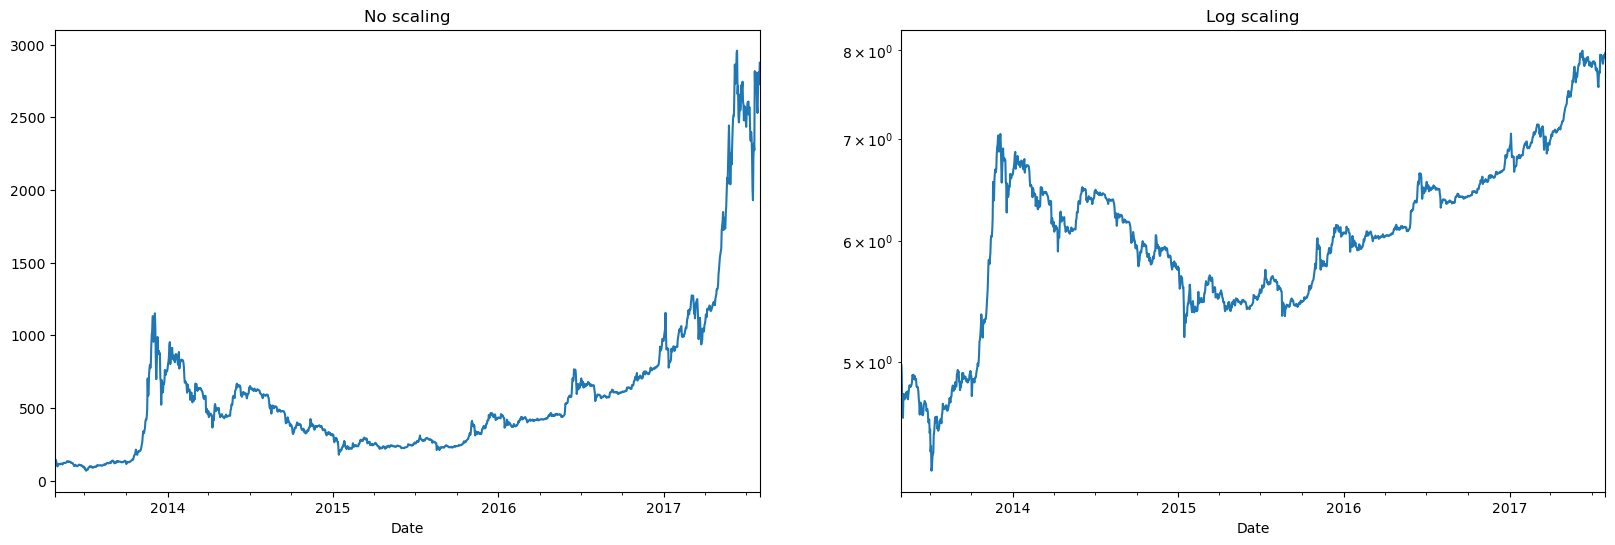

In [38]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
df['Close'].plot()
plt.title('No scaling')

plt.subplot(1,2,2)
np.log1p(df['Close']).plot()
plt.title('Log scaling')
plt.yscale('log')

In [42]:
df.head(4)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"


### 6.. Analyse closing Price on Yearly , Quarterly , monthly basis !

In [50]:
df['Close'].resample('Y').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: A-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

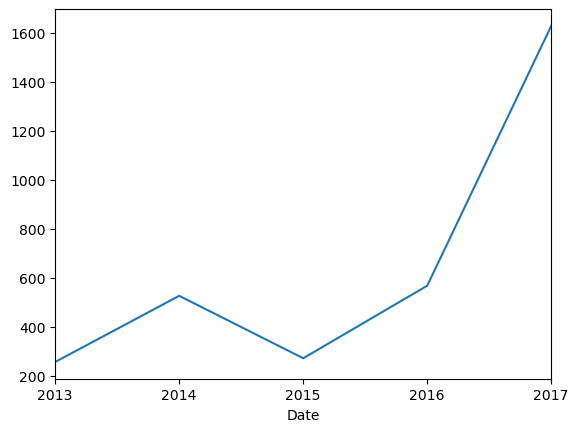

In [45]:
df['Close'].resample('Y').mean().plot()

In [49]:
df['Close'].resample('Q').mean()

Date
2013-06-30     115.162188
2013-09-30     111.291196
2013-12-31     502.657609
2014-03-31     700.586000
2014-06-30     520.929341
2014-09-30     534.055435
2014-12-31     357.075761
2015-03-31     251.209333
2015-06-30     236.858022
2015-09-30     254.859891
2015-12-31     346.037065
2016-03-31     410.728571
2016-06-30     512.492747
2016-09-30     615.702283
2016-12-31     732.721413
2017-03-31    1034.707444
2017-06-30    1912.552198
2017-09-30    2519.418387
Freq: Q-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

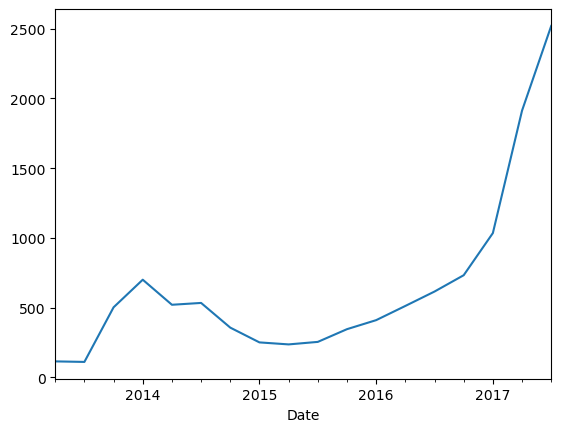

In [46]:
df['Close'].resample('Q').mean().plot()

In [48]:
df['Close'].resample('M').mean()

Date
2013-04-30     139.250000
2013-05-31     119.993226
2013-06-30     107.761333
2013-07-31      90.512258
2013-08-31     113.905161
2013-09-30     130.061667
2013-10-31     158.311935
2013-11-30     550.420667
2013-12-31     800.780968
2014-01-31     844.168387
2014-02-28     661.618214
2014-03-31     592.200323
2014-04-30     461.362000
2014-05-31     486.651290
2014-06-30     615.917333
2014-07-31     618.025484
2014-08-31     536.087742
2014-09-30     445.186333
2014-10-31     364.150000
2014-11-30     366.100000
2014-12-31     341.268387
2015-01-31     248.782581
2015-02-28     234.153571
2015-03-31     269.041290
2015-04-30     235.491667
2015-05-31     236.996774
2015-06-30     238.081000
2015-07-31     279.563871
2015-08-31     250.734516
2015-09-30     233.595333
2015-10-31     264.855161
2015-11-30     348.883333
2015-12-31     424.464516
2016-01-31     410.844516
2016-02-29     404.408276
2016-03-31     416.525161
2016-04-30     434.339333
2016-05-31     461.953871
2016-06

<Axes: xlabel='Date'>

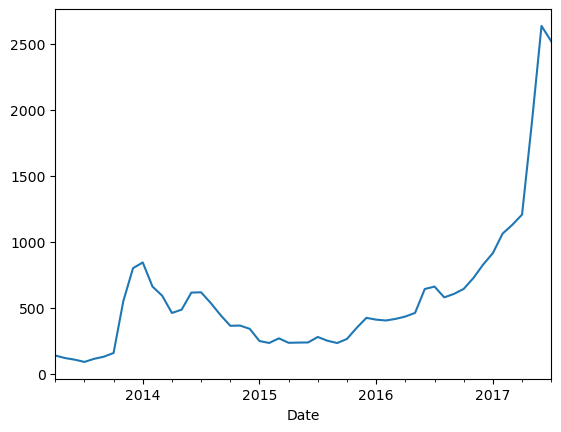

In [47]:
df['Close'].resample('M').mean().plot()